# Lab 3: Interferències

## Enginyeria Acústica 2021

Genís Plaja - genis.plaja@upf.edu - Despatx 55.312 (Edifici Tànger)

**NOVEMBRE 2022**

### NOTE: Although we provide the exercise indications in English, an important part of the Lab materials are written in Catalan to better comply with the theory materials. For language-related enquires please send an email to genis.plaja@upf.edu. However, please note that the Labs can be completed and submitted using whether Catalan or English. I will return the feedback using the language you have chosen to complete the labs.

**Puntuació:**

* **Exercici 1**: Superposició d'ones (1p)
* **Exercici 2**: Interferència de dues ones amb mateixa freqüència i amplitud (3p)
* **Exercici 3**: Interferència de dues ones amb diferent freqüència (3p)
* **Exercici 4**: Ones estacionàries (3p)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile

from IPython import display as ipd

%matplotlib inline

def singen(A, tt, f, phase):
    yy = A * np.sin(2*np.pi*f*tt+phase)
    return yy

## Exercici 1: Superposició d'ones 

<div class="alert alert-block alert-success">

**a) Crea una funció `sinus2bat()` que utilitzi la funció `singen()` per generar dues sinusoïdes amb freqüències de 122 Hz i 120 Hz i amplitud 0.5, les sumi i guardi el resultat en un arxiu d'àudio (sinus2bat1.wav). Explica què sents quan reprodueixes el so.** Podeu utilitzar la funció `singen()` que us donem amb l'enunciat a la cel·la anterior o fer servir la vostra. Podeu modificar els inputs de la funció com més un convingui.
    
<br>
    
**[ENG] a) Write a function `sinus2bat()` that uses `singen()` to generate two sinuoids with frequencies of 122 Hz i 120 Hz and amplitude 0.5, sums both sinusoids together and save the result in an audio file (sinus2bat1.wav). Explain what you hear.**

</div>

In [2]:
def sinus2bat():
  fs = 16000
  tt = np.arange(0, 5, 1/fs)    # array temporal
  sin1 = singen(0.5, tt, 122, 0)  # cream sinusoides
  sin2 = singen(0.5, tt, 120, 0)

  sum = sin1+sin2   # sumem
  soundfile.write('sinus2bat1.wav', sum, fs)  # guardem resultat a l'arxiu
  return ipd.Audio(sum, rate=fs)  # retornem l'àudio resultant

sinus2bat()

La interferència produida per aquestes dues sinusoides fa l'efecte d'un beat, és a dir, podriem dir que batega. Això es deu a què ambdues tenen una freqüència molt semblant, i a alguns punts la interferència que s'obté és constructiva (es sumen les amplituds) però a altres és destructiva, on l'amplitud és zero.

La freqüència a la que ocorren aquests beats és igual a la diferència entre les dues freqüencies, en aquest cas, 2 Hz.

<div class="alert alert-block alert-success">

**b) Adapta la funció anterior per crear-ne una de nova, `sinus2bat_ste()`, que guardi cada sinusoide en un canal separat (i.e. stereo) d'un arxiu d'àudio (sinus2bat2.wav). Què sents en aquest cas? Escolta amb auriculars i si pots, també amb altaveus i mou-te per l'espai.** 
    
<br>
    
**[ENG] b) Create a modified version of the implemented function, `sinus2bat_ste()`, that now stores the two sinusoids in separated channels (i.e. stereo) in sinus2bat2.wav. What do you hear now? Use, if possible, headphones, and also speakers and move around the room.** 

Ajuda: Per generar un arxiu stereo amb `soundfile.write()` l'array d'entrada ha de tenir dues dimensions, [frames x 2]. És a dir: dues columnes, una per cada canal.

</div>

In [5]:
from IPython.display import Audio 
from IPython.core.display import display

def sinus2bat_ste():
    fs = 16000
    tt = np.arange(0, 5, 1/fs)
    sin1 = singen(0.5, tt, 122, 0)
    sin2 = singen(0.5, tt, 120, 0)
    sin = np.column_stack((sin1, sin2))   # cream l'array d'entrada, que tengui per columnes cada sinusoide

    soundfile.write('sinus2bat2.wav', sin, fs)
    return    # en aquest cas no podem fer return de l'àudio resultant, perquè ara té dues dimensions i no funciona amb ipd.Audio
sinus2bat_ste()

L'efecte que escoltem amb aquest nou arxiu és bastant diferent.
Per una banda, si escoltem l'àudio amb només un auricular, escoltem només una de les sinusoides, ja que cada una es reprodueix per un auricular. Per tant, al no estar juntades al mateix canal, quan escoltem amb els dos auriculars no es crea l'efecte de beat tan evident que teniem a l'apartat anterior. Encara així, quan el nostre cervell suma les dues sinusoides, es deixa intuir un efecte com d'anada i tornada, de beat.

## Exercici 2: Interferència de dues ones amb mateixa freqüència i amplitud

Siguin dues ones harmòniques $y_1$ i $y_2$ (en unitats del SI):
$$
y_1 = 0.3 sin(\pi(3 x - 200 t))
$$
$$
y_2 = 0.3 sin(\pi (3 x - 200 t) - 0.5)
$$


que es propaguen simultàniament en un mateix medi.

<div class="alert alert-block alert-success">

**a) Crea una funció `ona_harm()` que generi una ona harmònica a partir dels paràmetres A, k, f, t, dist, $\varphi$.** **dist** serà la distància a recórrer, que definirà el rang del vector _xx_; **t** serà un valor de temps en segons - i no el vector de temps sencer.
    
<br>
    
**[ENG] a) Create a function `ona_harm()` that generates a harmonic wave from parameters A, k, f, t, dist, $\varphi$.** **dist** is the running distance defined by the range of vector _xx_; **t** is a particular timestep in seconds.

</div>

In [6]:
def ona_harm(A, k, f, t, dist, phi, step):
    xx = np.arange(0, dist, step)   # vector espaial
    omega = 2*np.pi*f
    yy = A*np.sin(k*xx - omega*t + phi)   # fòrmula d'ona harmònica
    return yy


<div class="alert alert-block alert-success">

**b) Calcula els paràmetres ($k, f, \varphi$) de $y_1$ i $y_2$ i utilitza la funció `ona_harm()` per generar els dos senyals amb una durada de 1 segon, una distància de 1 metre, una amplitud de 1 i una freqüència de mostreig de 8000 Hz. Fes una gràfica amb els dos senyals, amb colors diferents, i afegeix una llegenda per distingir els senyals per color.** 
    
<br>
    
**[ENG] b) Compute the parameters ($k, f, \varphi$) of $y_1$ and $y_2$ and use the function `ona_harm()` to generate two signals of duration 1 second, a distance of 1 metre, and amplitude of 1. Use a sampling freuquency of 8000 Hz. Generate a plot with the two signals, each one with a different color, and add a legend.** 
    
<br>

Recorda que les ones harmòniques tenen el vector de temps (t) i el vector de posició (x), i per això caldrà fer una gràfica dinàmica per veure el moviment dels senyals. Podeu re-utilitzar el codi de la pràctica 1 o utilitzar l'exemple a continuació. Atenció: al codi següent hi heu d'afegir les línies on crideu `ona_harm()` amb els paràmetres adequats, i heu de modificar el codi de crear els plots per tal d'afegir la llegenda. Consulteu la documentació de `matplotlib.pyplot`.
    
**Va que ja sabeu com es fan els plots animats amb IPython i matplotlib!**

</div>

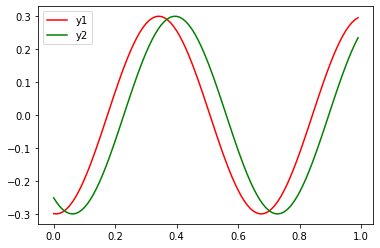

KeyboardInterrupt: ignored

In [7]:
from IPython.display import display, clear_output

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
# definir paràmetres dur, A, fs, dist, i els vectors de temps (tt) i posició (xx)
dur = 1
dist = 1
step = 0.01
xx = np.arange(0, dist, step)
amp = 0.3       # treballem amb l'amplitud que especifica la fòrmula i no l'enunciat, encara que el resultat és el mateix però escalat
fs = 8000
k = 3*np.pi
f = 100   # aquesta és la freqüència en Hz, ja que és el paràmetre que necessitem per ona_harm. Allà es calcula omega

phi2 = -0.5

tt = np.arange(0, dur, 1/fs)

ax.set_xlim(0,dist)

for t in tt:  # Iteram per l'array temporal i calculem el valor de les dues ones a cada valor de temps
    
    y1 = ona_harm(amp, k, f, t, dist, 0, step)
    y2 = ona_harm(amp, k, f, t, dist, phi2, step)

    plt.plot(xx, y1, 'r', label = 'y1')     # especificacions de color i de la llegenda
    plt.plot(xx, y2, 'g', label = 'y2')
    plt.legend()
    plt.pause(0.2)
    clear_output(wait = True)
    

<div class="alert alert-block alert-success">

**c) Un cop fets els plots, volem estudiar com s'interfereixen els senyals entre ells. Començarem per visualitzar com és la seva suma: $y = y_1 + y_2$. Utilitza el codi de l'apartat anterior i afegeix un plot del senyal resultant, y. Plota també y1 o y2 per entendre com passa l'interferència. Recorda afegir la llegenda.**
    
<br>
    
**[ENG] c) Once the plots are done, we want to study how the signals interfere between them. Start by visualizing the sum: $y = y_1 + y_2$. Use the code from previous exercise and add the plot of the resulting sum of signals using a different color.**

</div>

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.set_xlim(0,dist)
xx = np.arange(0, dist, 0.01)
for t in tt:
    
    y1 = ona_harm(amp, k, f, t, dist, 0, step)
    y2 = ona_harm(amp, k, f, t, dist, phi2, step)
    y = y1 + y2

    plt.plot(xx, y1, 'r', label = 'y1')
    plt.plot(xx, y2, 'g', label = 'y2')
    plt.plot(xx, y, 'b', label = 'y1+y2')
    plt.legend()
    plt.pause(0.2)
    clear_output(wait = True)

KeyboardInterrupt: ignored

<div class="alert alert-block alert-success">

**d) Ara que ja sabem quina forma té la suma, volem calcular, utilitzant les fórmules de teoria (dues ones amb la mateixa freqüència), quines són l'amplitud, la freqüència i la fase inicial de l'ona resultant. Per fer això, crea una funció `interf()` que rebi com a paràmetres l'amplitud (A), les fases inicials ($\varphi_1 i \varphi_2$), f, k, la distància i la durada i:**
* **calculi l'amplitud, freqüència i fase inicial de l'ona resultant a partir de les fórmules**
* **faci una gràfica del senyal resultant amb `ona_harm()` amb els nous paràmetres (fs, durada i posició iguals que l'apartat (a))**
    
**Comproveu que la gràfica és la mateixa que la resultant de sumar directament $y_1$ amb $y_2$.**
    
<br>
    
**[ENG] d) Now that we now the shape of the sum, we want to use to equations from the theory to compute the variables of the resultant sinusoid. To do so, create a function `interf()` that with input parameters A, the two phases ($\varphi_1 i \varphi_2$), f, k, the distance and duration, and that:**
* **computes the amplitude, frequency and initial phase using hte theory formulation**
* **crate a plot of the output sinusoid using `ona_harm()` with the new parameters (fs, duration and positions as in section (a))**
    
**Check that the plot looks the same as when summing directly the two waveforms $y_1$ and $y_2$.**



**NOTE**. Us donem un exemple dels inputs de `interf()` però utilitzeu la nomenclatura que us sigui més còmode.
    
</div>

In [9]:
def interf(A, phi1, phi2, f, k, dist, dur, step):
    
    ## Definir la nova A i la nova fase
    newA = 2*A*np.cos((phi1-phi2)/2)
    newPhi = (phi1 - phi2)/2

    ## Crear figure
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)

    ax.set_xlim(0,dist)
    
    xx = np.arange(0, dist, step)
    fs = 8000
    tt = np.arange(0, dur, 1/fs)

    for t in tt:
        
        sum = ona_harm(newA, k, f, t, dist, newPhi, step)

        plt.plot(xx, sum, 'b', label = 'Interference')
        plt.legend()
        plt.pause(0.2)
        clear_output(wait = True)
    return

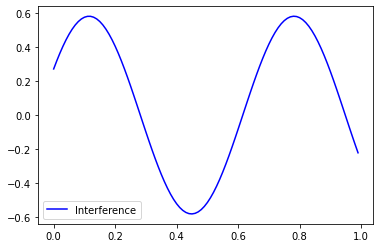

KeyboardInterrupt: ignored

In [10]:
amp = 0.3   # Declarem les variables que necessitem 
phi1 = 0
phi2 = -0.5
f = 100
k = 3*np.pi
dur = 1
dist = 1
step = 0.01
interf(amp, phi1, phi2, f, k, dist, dur, step)

## Exercici 3: Interferència de dues ones amb diferent freqüència

Siguin dues ones harmòniques $y_1$ i $y_2$ (en unitats del SI):
$$
y_1 = 0.3 sin(\pi(5 x - 150 t))
$$
$$
y_2 = 0.3 sin(\pi (3 x - 200 t))
$$


que es propaguen simultàniament en un mateix medi.

<div class="alert alert-block alert-success">
 
**a) Calcula els paràmetres de $y_1$ i $y_2$ i utilitza la funció `ona_harm()` per generar els dos senyals amb una durada de 1 segon, una distància de 1 metre, una amplitud de 1 i una freqüència de mostreig de 8000 Hz. Fes una gràfica amb els dos senyals, i la suma de les dues (y = y1 + y2). Afegeix una llegenda per distingir-les.**
    
**Quines diferències veus entre aquest cas i el de l'apartat anterior?**

<br>
    
**[ENG] a) Compute the parameters of $y_1$ i $y_2$ and use the function `ona_harm()` to generate the two signals with duration of 1 second and distance of 1 meter, amplitude of 1 and sampling frequency of 8000Hz. Create a plot of the two signals and also the sum between them (y = y1 + y2). Add a legend.**
    
**What differences can you see between this exercise and the previous one?**

</div>

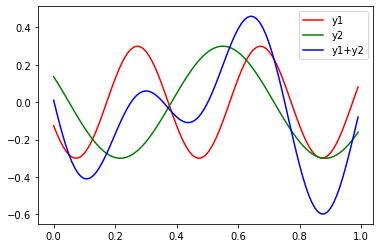

KeyboardInterrupt: ignored

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

# definir paràmetres dur, A, fs, dist, i els vectors de temps (tt) i posició (xx)

dur = 1
dist = 1
step = 0.01
xx = np.arange(0, dist, step)
amp = 0.3
fs = 8000
k1 = 5*np.pi
k2 = 3*np.pi
f1 = 75
f2 = 100

tt = np.arange(0, dur, 1/fs)

ax.set_xlim(0,dist)

for t in tt:
    
    y1 = ona_harm(amp, k1, f1, t, dist, 0, step)
    y2 = ona_harm(amp, k2, f2, t, dist, 0, step)
    y = y1 + y2

    plt.plot(xx, y1, 'r', label = 'y1')
    plt.plot(xx, y2, 'g', label = 'y2')
    plt.plot(xx, y, 'b', label = 'y1+y2')
    plt.legend()
    plt.pause(0.2)
    clear_output(wait = True)

Al haver sumat ara dues ones de freqüències diferents, el primer que observem és que ara la seva velocitat de propagació també és diferent. També es veu molt clarament com la suma d'aquestes no té res a veure amb l'anterior, on ens quedava una ona amb la mateixa freqüència i on només canviaven l'amplitud i la fase. En aquest cas, la freqüència també canvia, fent que arribi a semblar un moviment no periòdic.

<div class="alert alert-block alert-success">

**b) Implementa la funció `interf2()` que rebi l'amplitud (A), les freqüències ($f_1, f_2$), els nombres d'ona ($K_1, K_2$), la distància i la durada, i:**
* **calculi els paràmetres de l'ona resultant.**
* **faci una gràfica, si pot ser animada, del senyal resultant implementant l'equació de l'ona resultant.**


**Comproveu que la gràfica amb l'equació és la mateixa que la resultant de sumar directament $y_1$ i $y_2$.**
    
<br>
    
**[ENG] b) Write a function `interf2()` that has inputs amplitude (A), frequencies ($f_1, f_2$), wave number ($K_1, K_2$) , distance, duration, and:**
* **calculate the parameters of the resulting wave.**
* **make a plot, animated if possible, of the resulting signal implementing the equation of the resulting wave.**

**Check that the shape of the wave is that same as when summing $y_1$ i $y_2$.**
    
<br>


Nota: feu servir aquest desenvolupament de la superposició de dues ones:


$$
y = 2A_0cos(\frac{k_1-k_2}{2}x-\frac{\omega_1-\omega_2}{2}t)sin(\frac{k_1+k_2}{2}x - \frac{\omega_1+\omega_2}{2}t)
$$


</div>

In [12]:
def interf2(A, f1, f2, k1, k2, dist, dur):
    xx = np.arange(0, dist, 0.01)
    omega1 = 2*np.pi*f1
    omega2 = 2*np.pi*f2
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    fs = 8000
    tt = np.arange(0, dur, 1/fs)

    ax.set_xlim(0,dist)

    for t in tt:
        yy = 2*A*np.cos((((k1-k2)/2)*xx)-(((omega1-omega2)/2)*t))*np.sin((((k1+k2)/2)*xx)-(((omega1+omega2)/2)*t))    # apliquem la fòrmula
        plt.plot(xx, yy, 'b', label = 'interf2')
        plt.legend()
        plt.pause(0.2)
        clear_output(wait = True)
    return

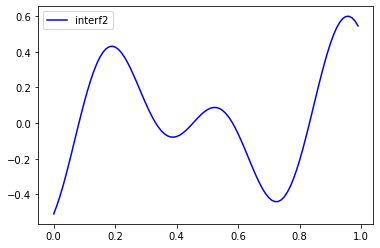

KeyboardInterrupt: ignored

In [13]:
amp = 0.3
f1 = 75
f2 = 100
k1 = 5*np.pi
k2 = 3*np.pi
dist = 1
dur = 1
interf2(amp, f1, f2, k1, k2, dist, dur)

## Exercici 4: Ones estacionàries
(3 punts)

<div class="alert alert-block alert-success">

**Si tenim una corda fixa pels dos extrems i provoquem una pertorbació en un dels dos extrems, aquesta pertorbació es propaga a través de la corda i quan arriba als extrems, es reflecteix i torna, en oposició de fase. El que passa en aquest moment és que tenim dues ones amb la mateixa freqüència i amplitud en sentit contrari.**

**Utilitza la funció `ona_harm()` per crear dues ones, $y_1, y_2$, iguals en sentit contrari.** Reviseu les equacions de la teoria d'ones estacionàries per recordar què diferencia dues ones iguals en sentit contrari.

**Per cadascun d'aquests grups de valors (f, k, step), on _step_ és el pas per crear els vectors de temps i posició, feu un plot dels dos senyals, $y_1, y_2$ amb amplitud 1, durada 1 segon i distància 1 metre:**

* f=10, k=5, step=0.01
* f=4, k=10, step=0.01
* f=30, k=20, step=0.02

Una bona implementació seria que tingueu una llista de f, una de k i una de step, i poguéssiu, automàticament, tenir una variable _config_ que fos 0, 1 o 2 per canviar fàcilment de un cas a l'altre. També podeu fer una funció addicional que tingui com a inputs f, k i step. Així re-utilitzeu al màxim el codi!
    
<br> 
    
**[ENG] If we do have a fixed string for the two boundaries and we provoke a perturbation in one of the two boundaries, this perturbation is propagated through the string and when it reaches the boundaries, it is reflected in opposite phase. We do have now two waves of the same frequency and amplitud but travelling towards opposite directions.**
    
**Use the function `ona_harm()` to create two waves, $y_1, y_2$, the same but travelling in opposite directions.**
    
**For each of the the following groups of values (f, k, step), where _step_ applies to time and space, plot the two signals with time and distance measures of 1:**

* f=10, k=5, step=0.01
* f=4, k=10, step=0.01
* f=30, k=20, step=0.02
    
    
</div>

In [14]:
def select_fks(f,k,step):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    dur = 1
    dist = 1
    amp = 1
    tt = np.arange(0, dur, step)
    xx = np.arange(0, dist, step)

    ax.set_xlim(0,dist)

    for t in tt:
        y1 = ona_harm(amp, k, f, t, dist, 0, step)
        y2 = ona_harm(amp, k, -f, t, dist, 0, step)     # La diferència entre dues ones en sentit contrari és el signe del terme omega*t, que podem afegir aquí
        plt.plot(xx, y1, 'r', label = 'y1')
        plt.plot(xx, y2, 'g', label = 'y2')
        plt.legend()
        plt.pause(0.2)
        clear_output(wait = True)
    return

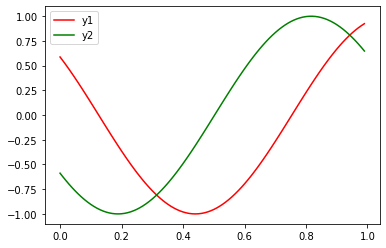

KeyboardInterrupt: ignored

In [15]:
select_fks(10, 5, 0.01)

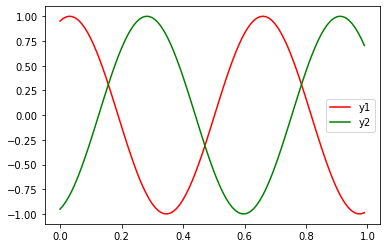

KeyboardInterrupt: ignored

In [16]:
select_fks(4, 10, 0.01)

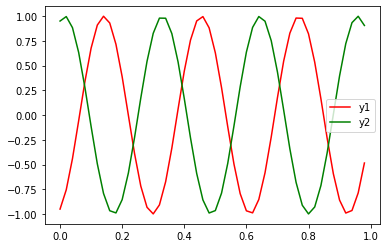

KeyboardInterrupt: ignored

In [17]:
select_fks(30, 20, 0.02)

<div class="alert alert-block alert-success">

**A continuació, utilitzant la funció de les ones estacionàries:**
$$
y(x,t) = 2Asin(kx)cos(\omega t)
$$

**Escolliu un dels tres casos anteriors i feu un plot de les dues ones per separat i de l'ona estacionària resultant, utilitzant l'equació de sobre. Tots tres plots en una mateixa figura, per veure el seu comportament conjunt.**
    
<br>
    
**[ENG] Now using the stationary wave formula:**
$$
y(x,t) = 2Asin(kx)cos(\omega t)
$$

**Chose one of the cases from the previous exercise and create a plot of each of the two waves and also the resulting stationary wave, using the above equaction. Use a single figure for the three plots so you can observe the difference.**
</div>

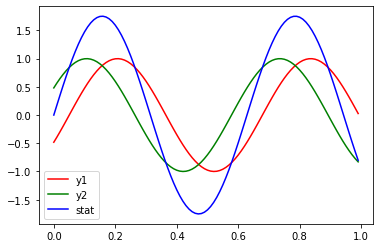

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
dur = 1
dist = 1
amp = 1
f = 4
omega = 2*np.pi*f
k = 10
step = 0.01
tt = np.arange(0, dur, step)
xx = np.arange(0, dist, step)

ax.set_xlim(0,dist)
ax.set_ylim(0,2*amp)
for t in tt:
    y1 = ona_harm(amp, k, f, t, dist, 0, step)
    y2 = ona_harm(amp, k, -f, t, dist, 0, step)
    stationary = 2*amp*np.sin(k*xx)*np.cos(omega*t)
    plt.plot(xx, y1, 'r', label = 'y1')
    plt.plot(xx, y2, 'g', label = 'y2')
    plt.plot(xx, stationary, 'b', label = 'stat')
    plt.legend()
    plt.pause(0.2)
    clear_output(wait = True)

Notice how the stationary wave is changing even when it does not look like it, because the y axis is changing values.